<a href="https://colab.research.google.com/github/nattaptiy/nlp100/blob/master/nlp100_unit7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Loading

In [58]:
!wget -c https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
!wget -c http://download.tensorflow.org/data/questions-words.txt
!wget -c http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip

!gunzip wordsim353.zip.gz
!unzip wordsim353.zip

--2020-06-01 08:33:24--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.141.174
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.141.174|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2020-06-01 08:33:25--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.143.128, 2a00:1450:4013:c01::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.143.128|:80... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.

--2020-06-01 08:33:27--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 208.97.177.37
Connecting to www.gabrilovich.com (w

60. 単語ベクトルの読み込みと表示

In [19]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


61. 単語の類似度

In [20]:
model["United_States"]

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

62. 類似度の高い単語10件

In [22]:
model.most_similar("United_States")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

63. 加法構成性によるアナロジー

In [23]:
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

64. アナロジーデータでの実験

In [0]:
with open('questions-words.txt') as file:
    lines = file.read().splitlines()

data = []
category = None
for line in lines:
    if line.startswith(':'):
        category = line[2:]
    else:
        lst = [category] + line.split(' ')
        data.append(lst)

In [40]:
data

[['capital-common-countries', 'Athens', 'Greece', 'Baghdad', 'Iraq'],
 ['capital-common-countries', 'Athens', 'Greece', 'Bangkok', 'Thailand'],
 ['capital-common-countries', 'Athens', 'Greece', 'Beijing', 'China'],
 ['capital-common-countries', 'Athens', 'Greece', 'Berlin', 'Germany'],
 ['capital-common-countries', 'Athens', 'Greece', 'Bern', 'Switzerland'],
 ['capital-common-countries', 'Athens', 'Greece', 'Cairo', 'Egypt'],
 ['capital-common-countries', 'Athens', 'Greece', 'Canberra', 'Australia'],
 ['capital-common-countries', 'Athens', 'Greece', 'Hanoi', 'Vietnam'],
 ['capital-common-countries', 'Athens', 'Greece', 'Havana', 'Cuba'],
 ['capital-common-countries', 'Athens', 'Greece', 'Helsinki', 'Finland'],
 ['capital-common-countries', 'Athens', 'Greece', 'Islamabad', 'Pakistan'],
 ['capital-common-countries', 'Athens', 'Greece', 'Kabul', 'Afghanistan'],
 ['capital-common-countries', 'Athens', 'Greece', 'London', 'England'],
 ['capital-common-countries', 'Athens', 'Greece', 'Madrid

In [45]:
from tqdm import tqdm
for i, lst in enumerate(tqdm(data)):
    data[i].extend(model.most_similar(positive = lst[2:4], negative = lst[1:2], topn = 1)[0])

  0%|          | 0/19544 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
100%|██████████| 19544/19544 [2:00:31<00:00,  2.70it/s]


In [46]:
data

[['capital-common-countries',
  'Athens',
  'Greece',
  'Baghdad',
  'Iraq',
  'Iraqi',
  0.6351870894432068],
 ['capital-common-countries',
  'Athens',
  'Greece',
  'Bangkok',
  'Thailand',
  'Thailand',
  0.7137669324874878],
 ['capital-common-countries',
  'Athens',
  'Greece',
  'Beijing',
  'China',
  'China',
  0.7235777974128723],
 ['capital-common-countries',
  'Athens',
  'Greece',
  'Berlin',
  'Germany',
  'Germany',
  0.6734622120857239],
 ['capital-common-countries',
  'Athens',
  'Greece',
  'Bern',
  'Switzerland',
  'Switzerland',
  0.4919748306274414],
 ['capital-common-countries',
  'Athens',
  'Greece',
  'Cairo',
  'Egypt',
  'Egypt',
  0.7527809739112854],
 ['capital-common-countries',
  'Athens',
  'Greece',
  'Canberra',
  'Australia',
  'Australia',
  0.583732545375824],
 ['capital-common-countries',
  'Athens',
  'Greece',
  'Hanoi',
  'Vietnam',
  'Viet_Nam',
  0.6276341676712036],
 ['capital-common-countries',
  'Athens',
  'Greece',
  'Havana',
  'Cuba',
  

65. アナロジータスクでの正解率

In [53]:
import numpy as np

semantic = [lst[4:6] for lst in data if not lst[0].startswith('gram')]
syntactic = [lst[4:6] for lst in data if lst[0].startswith('gram')]
semantic_acc = np.mean([x == y for x, y in semantic])
print('semantic_acc :', semantic_acc)
syntactic_acc = np.mean([x == y for x, y in syntactic])
print('syntactic_acc :', syntactic_acc)

semantic_acc : 0.7308602999210734
syntactic_acc : 0.7400468384074942


66. WordSimilarity-353での評価

In [90]:
with open('combined.csv') as file:
  data_testsim = file.read().splitlines()

data_testsim = [line.split(',') for line in data_testsim]
data_testsim = data_testsim[1:]
print(data_testsim)

[['love', 'sex', '6.77'], ['tiger', 'cat', '7.35'], ['tiger', 'tiger', '10.00'], ['book', 'paper', '7.46'], ['computer', 'keyboard', '7.62'], ['computer', 'internet', '7.58'], ['plane', 'car', '5.77'], ['train', 'car', '6.31'], ['telephone', 'communication', '7.50'], ['television', 'radio', '6.77'], ['media', 'radio', '7.42'], ['drug', 'abuse', '6.85'], ['bread', 'butter', '6.19'], ['cucumber', 'potato', '5.92'], ['doctor', 'nurse', '7.00'], ['professor', 'doctor', '6.62'], ['student', 'professor', '6.81'], ['smart', 'student', '4.62'], ['smart', 'stupid', '5.81'], ['company', 'stock', '7.08'], ['stock', 'market', '8.08'], ['stock', 'phone', '1.62'], ['stock', 'CD', '1.31'], ['stock', 'jaguar', '0.92'], ['stock', 'egg', '1.81'], ['fertility', 'egg', '6.69'], ['stock', 'live', '3.73'], ['stock', 'life', '0.92'], ['book', 'library', '7.46'], ['bank', 'money', '8.12'], ['wood', 'forest', '7.73'], ['money', 'cash', '9.15'], ['professor', 'cucumber', '0.31'], ['king', 'cabbage', '0.23'], ['

In [91]:
for i, lst in enumerate(data_testsim):
    data_testsim[i].append(model.similarity(lst[0], lst[1]))
print(data_testsim)

[['love', 'sex', '6.77', 0.2639377], ['tiger', 'cat', '7.35', 0.5172962], ['tiger', 'tiger', '10.00', 0.99999994], ['book', 'paper', '7.46', 0.3634626], ['computer', 'keyboard', '7.62', 0.39639163], ['computer', 'internet', '7.58', 0.40686232], ['plane', 'car', '5.77', 0.3779698], ['train', 'car', '6.31', 0.3402561], ['telephone', 'communication', '7.50', 0.33218452], ['television', 'radio', '6.77', 0.6114971], ['media', 'radio', '7.42', 0.3899161], ['drug', 'abuse', '6.85', 0.24085768], ['bread', 'butter', '6.19', 0.6417261], ['cucumber', 'potato', '5.92', 0.5678562], ['doctor', 'nurse', '7.00', 0.63195235], ['professor', 'doctor', '6.62', 0.21336083], ['student', 'professor', '6.81', 0.4206618], ['smart', 'student', '4.62', 0.066302165], ['smart', 'stupid', '5.81', 0.47047195], ['company', 'stock', '7.08', 0.34156868], ['stock', 'market', '8.08', 0.4680556], ['stock', 'phone', '1.62', 0.123267554], ['stock', 'CD', '1.31', 0.06611791], ['stock', 'jaguar', '0.92', 0.036066912], ['stock

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
from scipy.stats import spearmanr
def rank(x):
    args = np.argsort(-np.array(x))
    rank = np.empty_like(args)
    rank[args] = np.arange(len(x))
    return rank

In [98]:
human = [float(lst[2]) for lst in data_testsim]
w2v = [lst[3] for lst in data_testsim]

human_rank = rank(human)
w2v_rank = rank(w2v)

print(spearmanr(human_rank, w2v_rank))

SpearmanrResult(correlation=0.700313895424209, pvalue=2.4846350292113526e-53)


67. k-meansクラスタリング

In [0]:
countries = {
    country
    for lst in data
    for country in [lst[2], lst[4]]
    if lst[0] in {'capital-common-countries', 'capital-world'}
} | {
    country
    for lst in data
    for country in [lst[1], lst[3]]
    if lst[0] in {'currency', 'gram6-nationality-adjective'}
}
countries = list(countries)
country_vectors = [model[country] for country in countries]

In [85]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(country_vectors)

for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('Class', i)
    print(', '.join([countries[k] for k in cluster]))

Class 0
Botswana, Kenya, Uganda, Eritrea, Nigeria, Angola, Burundi, Ghana, Mozambique, Liberia, Senegal, Mauritania, Sudan, Malawi, Namibia, Mali, Somalia, Zimbabwe, Madagascar, Guinea, Rwanda, Zambia, Gambia, Niger, Gabon
Class 1
Honduras, Indonesia, Tuvalu, Vietnam, Cuba, Venezuela, Guyana, Cambodia, Dominica, Suriname, Belize, Nicaragua, Thailand, Bangladesh, Samoa, Bahamas, Fiji, Bhutan, Taiwan, Jamaica, Nepal, Mexico, Chile, Laos, Philippines, Colombia, Peru, Ecuador
Class 2
Algeria, Iran, Jordan, Oman, Afghanistan, Iraq, Qatar, Pakistan, Syria, Tunisia, Egypt, Lebanon, Bahrain, Morocco, Israel, Libya
Class 3
Turkmenistan, Latvia, Montenegro, Bulgaria, Azerbaijan, Albania, Macedonia, Poland, Serbia, Croatia, Tajikistan, Lithuania, Slovakia, Cyprus, Russia, Kazakhstan, Armenia, Hungary, Turkey, Greece, Uzbekistan, Romania, Slovenia, Georgia, Belarus, Estonia, Moldova, Ukraine, Kyrgyzstan
Class 4
Korea, Netherlands, Belgium, England, Canada, Argentina, Iceland, Malaysia, Malta, Denm

68. Ward法によるクラスタリング

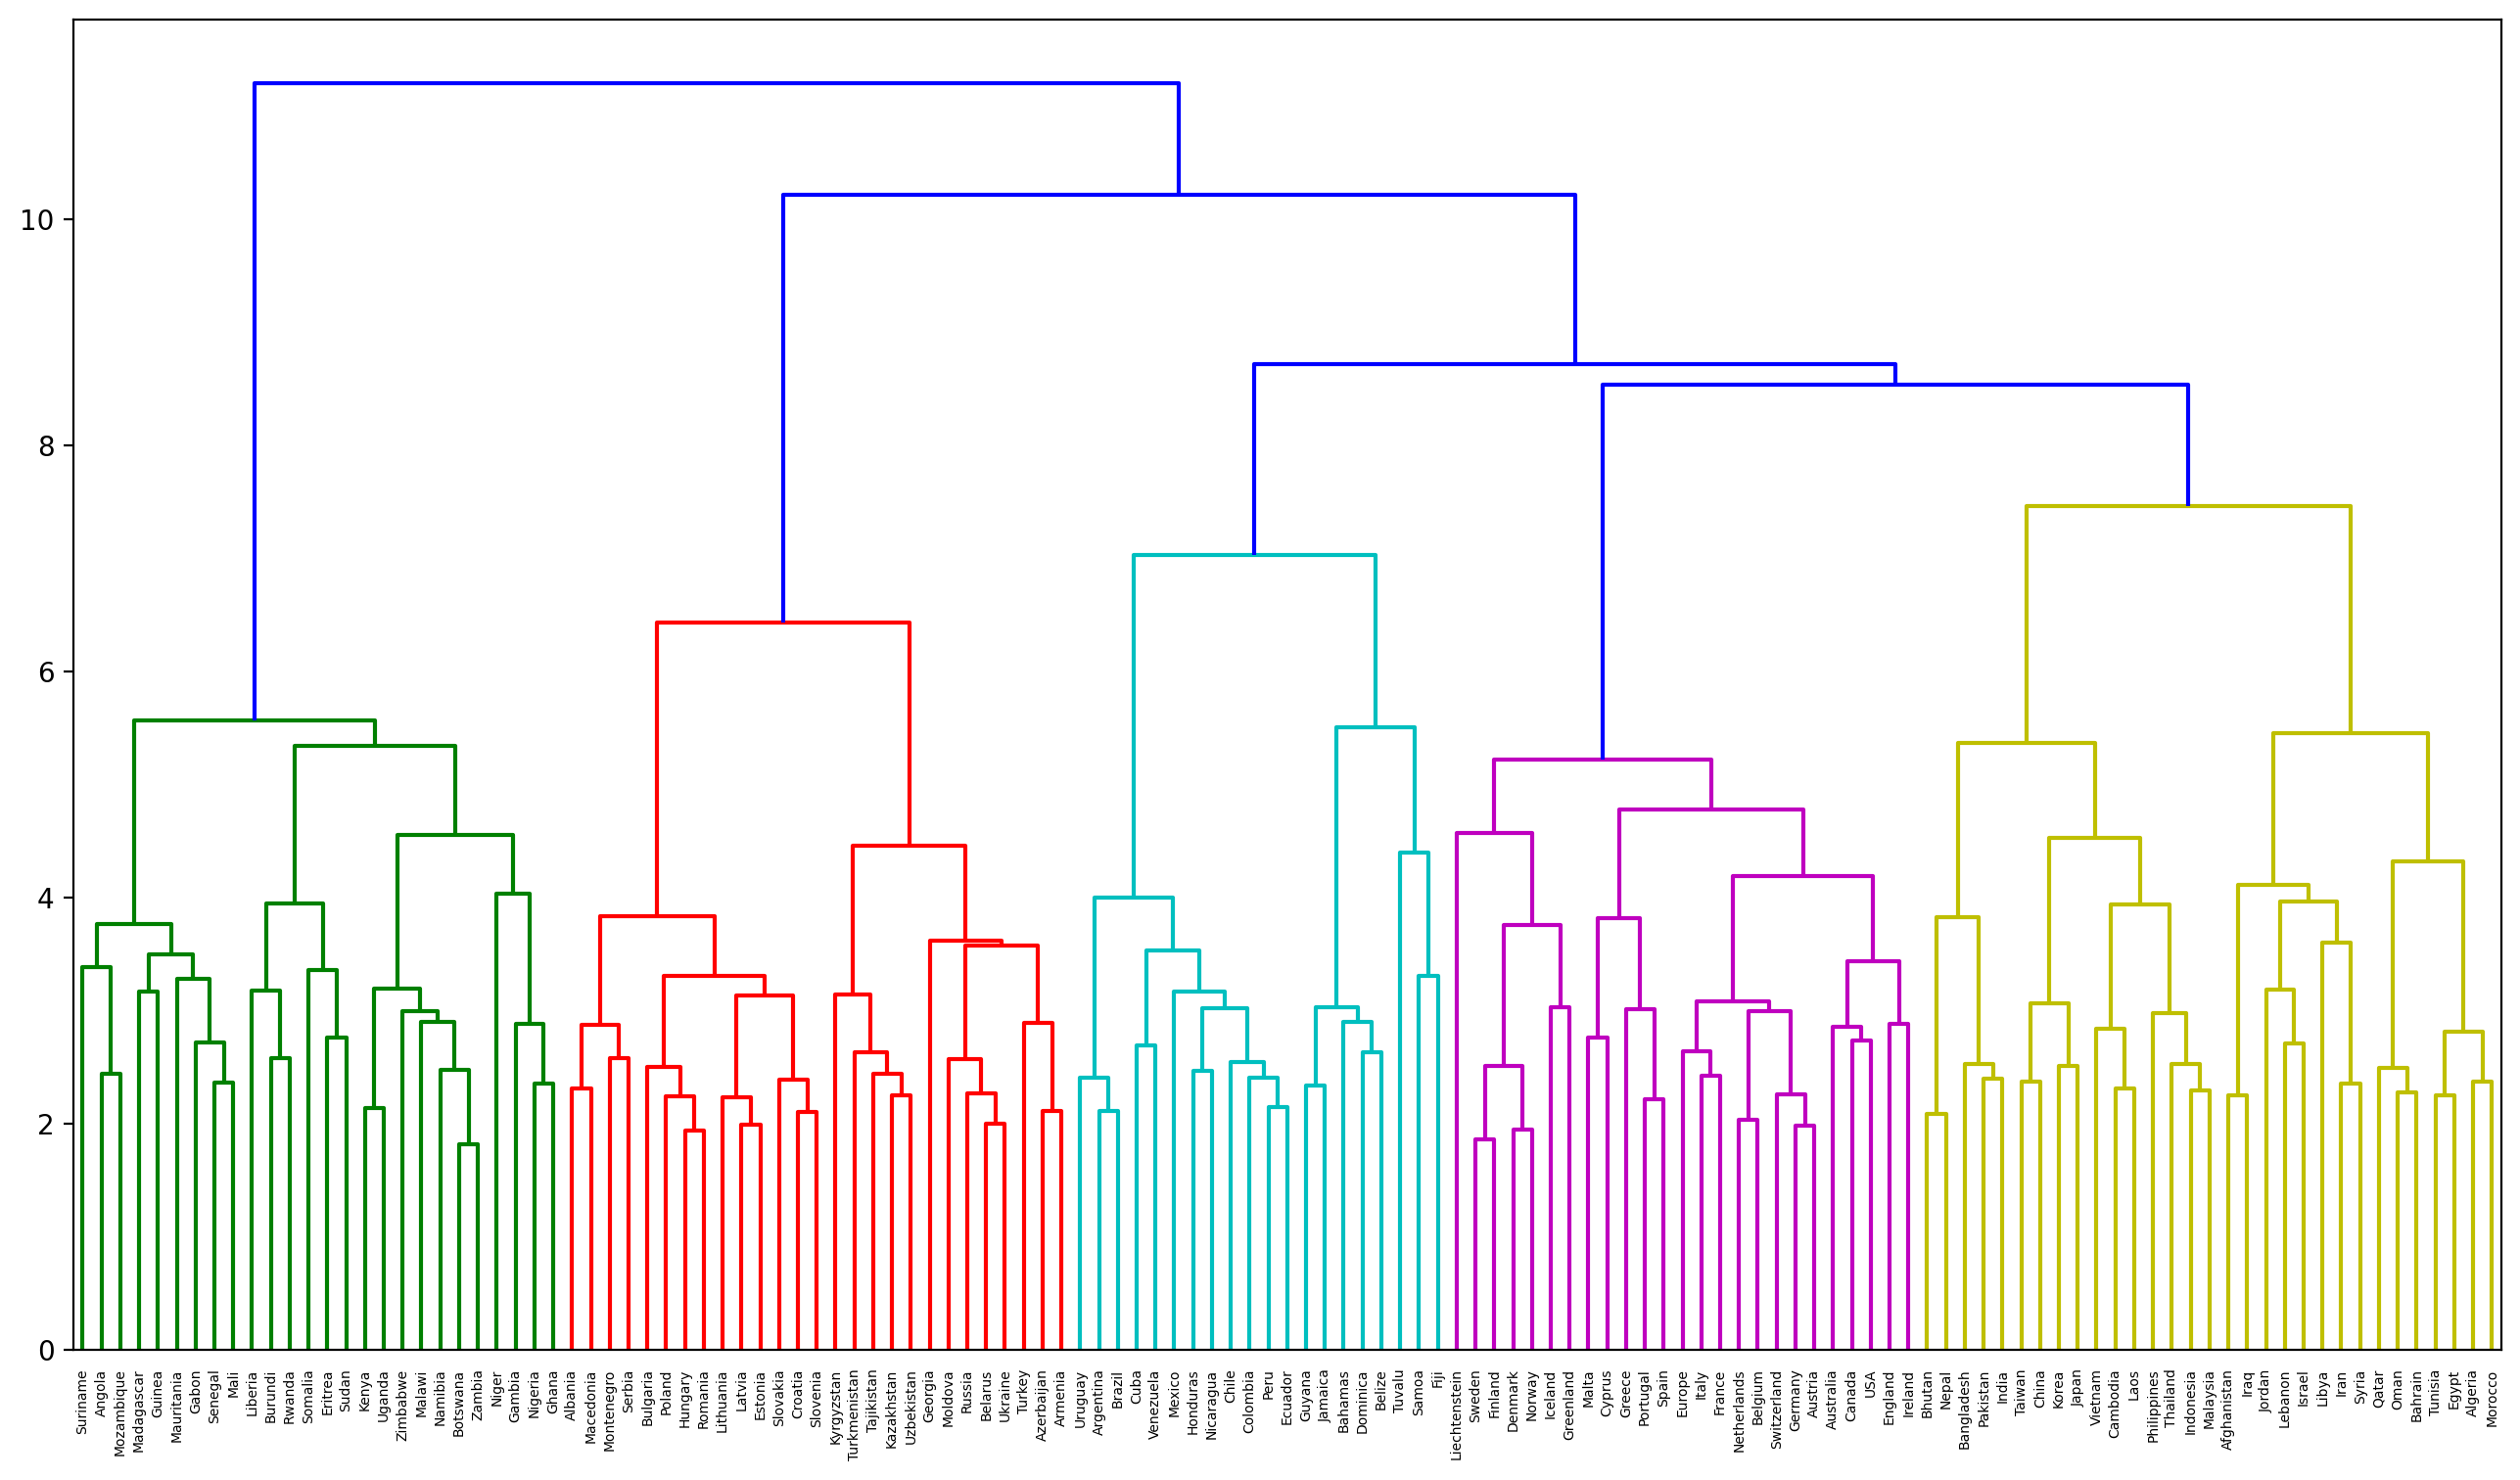

In [88]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9), dpi=200)
Z = linkage(country_vectors, method='ward')
dendrogram(Z, labels = countries)
plt.show()

69. t-SNEによる可視化

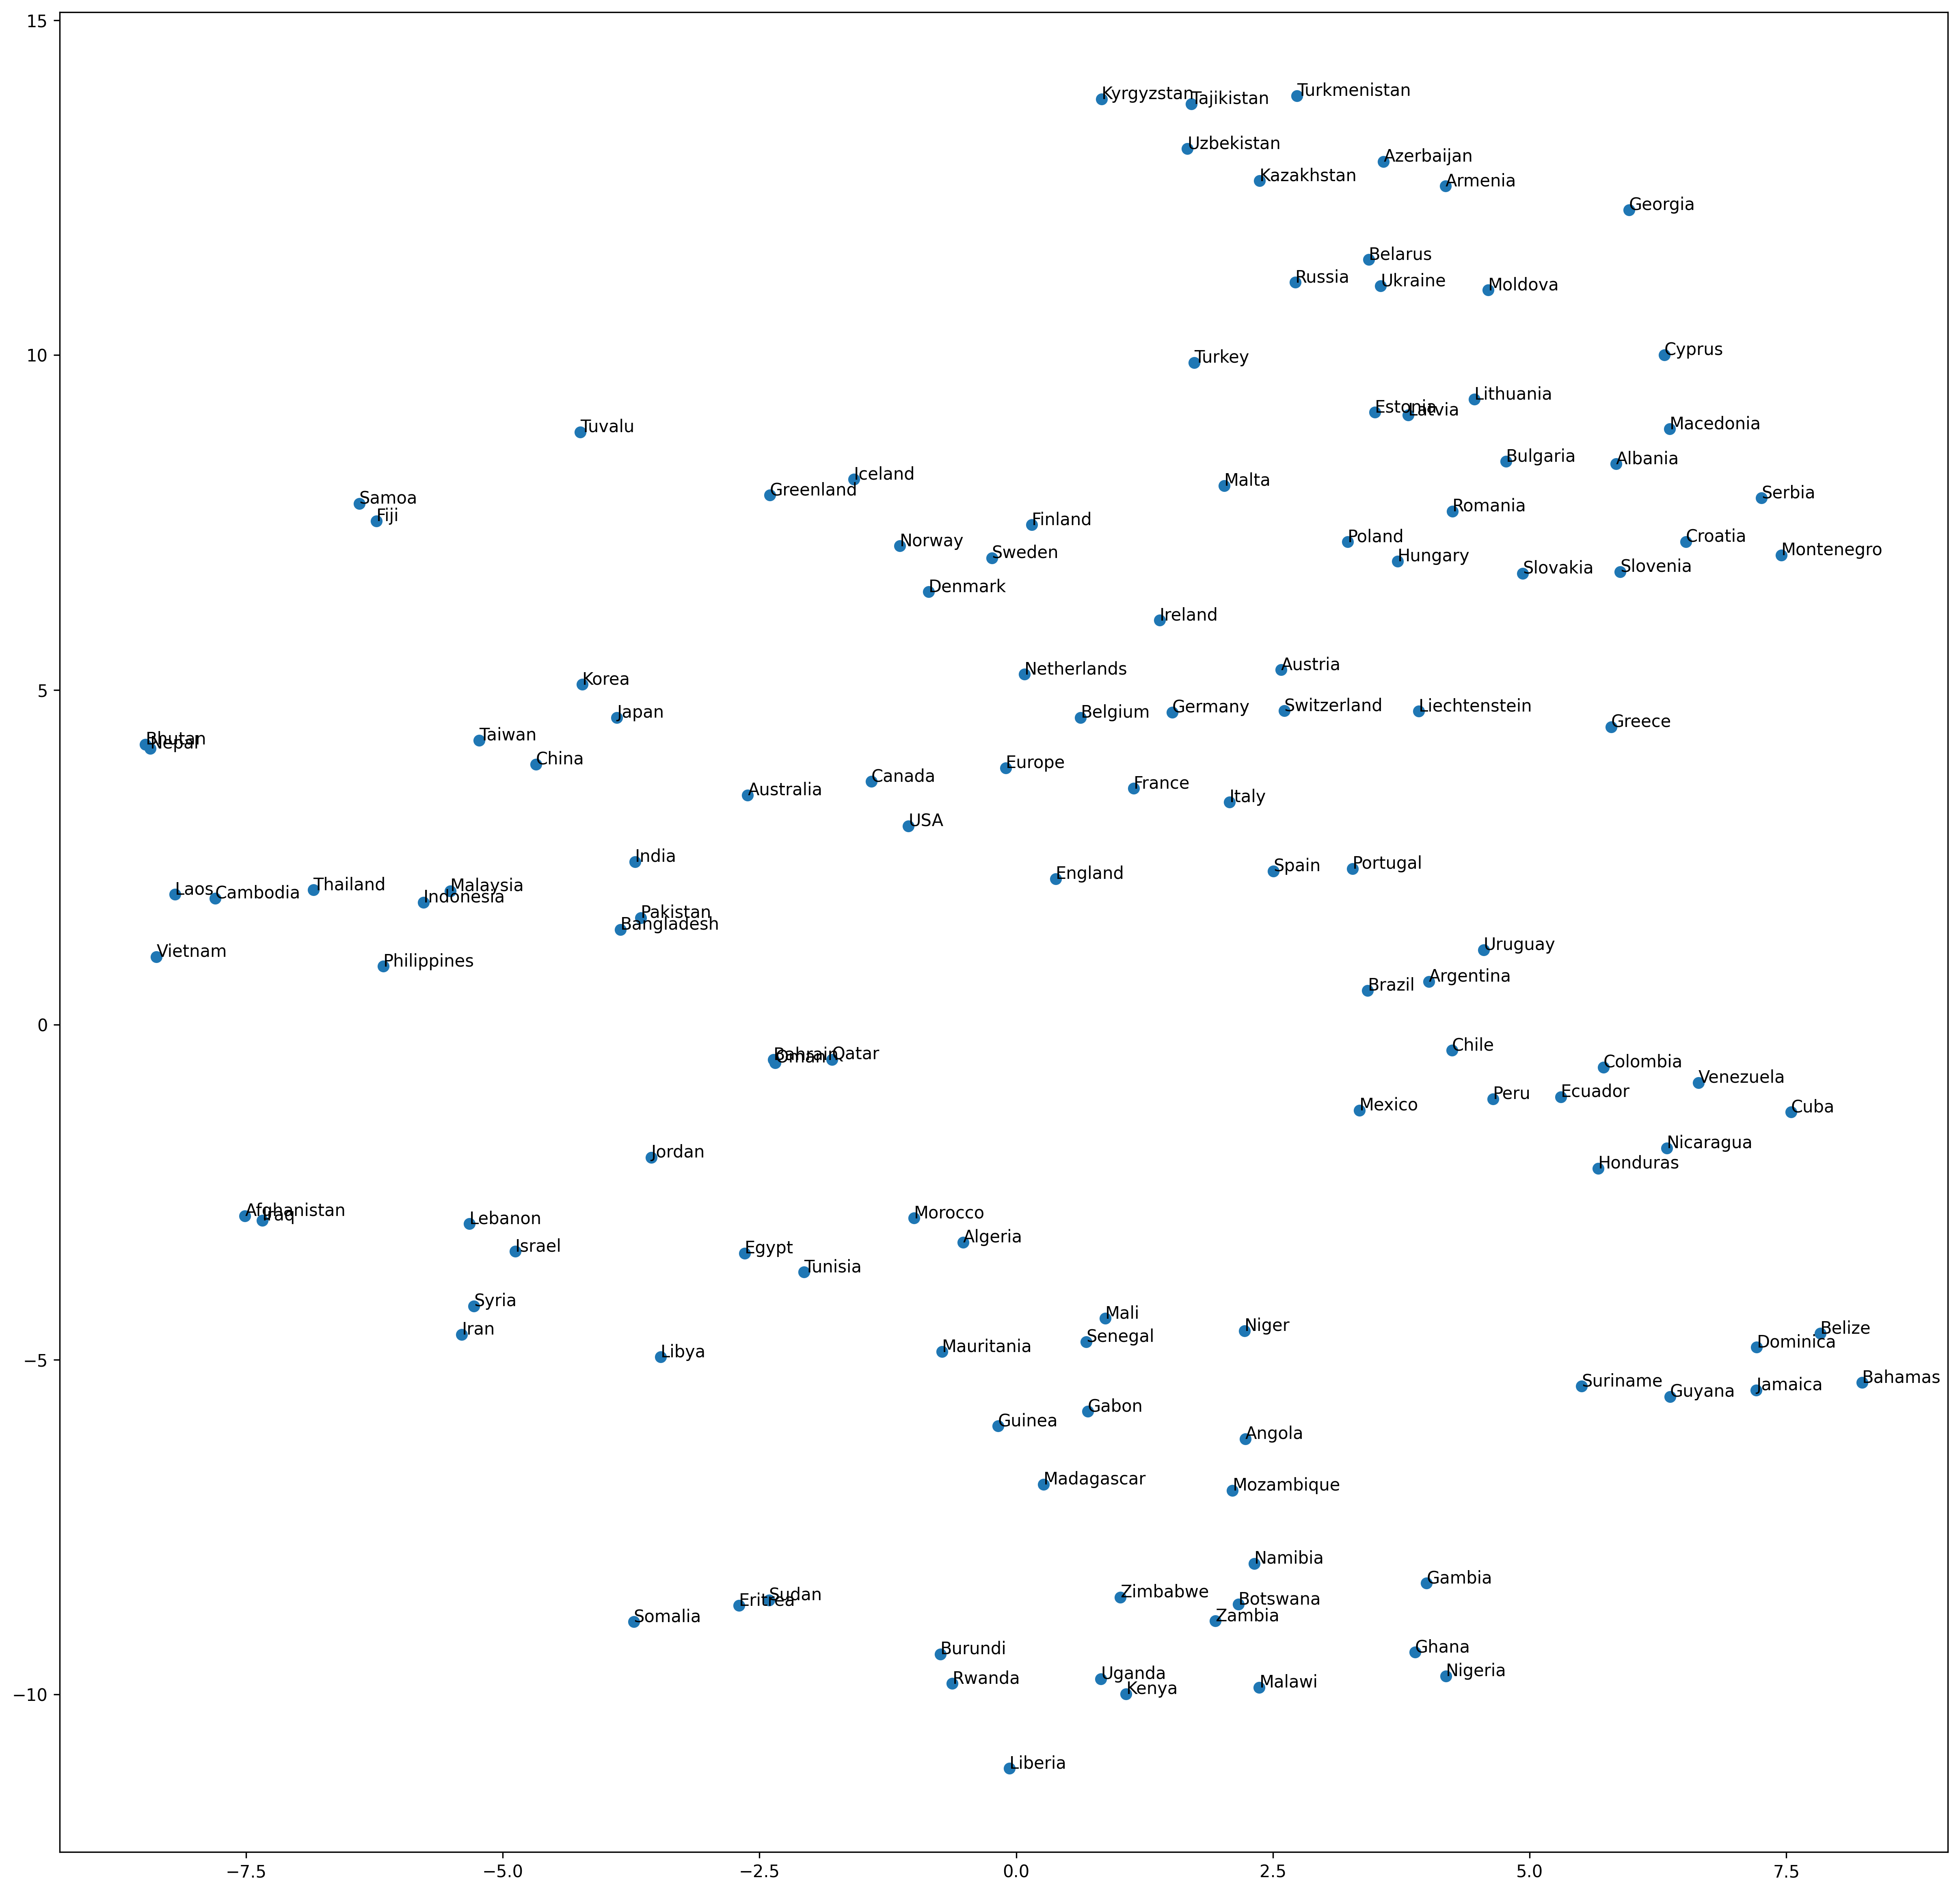

In [89]:
from sklearn.manifold import TSNE

tsne = TSNE()
tsne.fit(country_vectors)

plt.figure(figsize=(20, 20), dpi=300)
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1])
for (x, y), name in zip(tsne.embedding_, countries):
    plt.annotate(name, (x, y))